In [14]:
# Basic Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

# Machine learning Libraries
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
import pylab 
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [15]:
df=pd.read_csv('LifeExpectancyData.csv')
pd.set_option('display.max_columns', None) 
df.columns=['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percent Expenditure', 'Hep B',
       'Measles', 'BMI', 'U-5 Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIVAIDS','GDP', 'Population', 'Thinness 10-19',
       'Thinness 5-9', 'Income Composition', 'Schooling']
#Canada and France are mislabeled as Developing
df[df['Country']=='France']['Status'].replace('Developing','Developed')
df[df['Country']=='Canada']['Status'].replace('Developing','Developed')
df.head(10)

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


AxesSubplot(0.125,0.125;0.698618x0.755)


,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


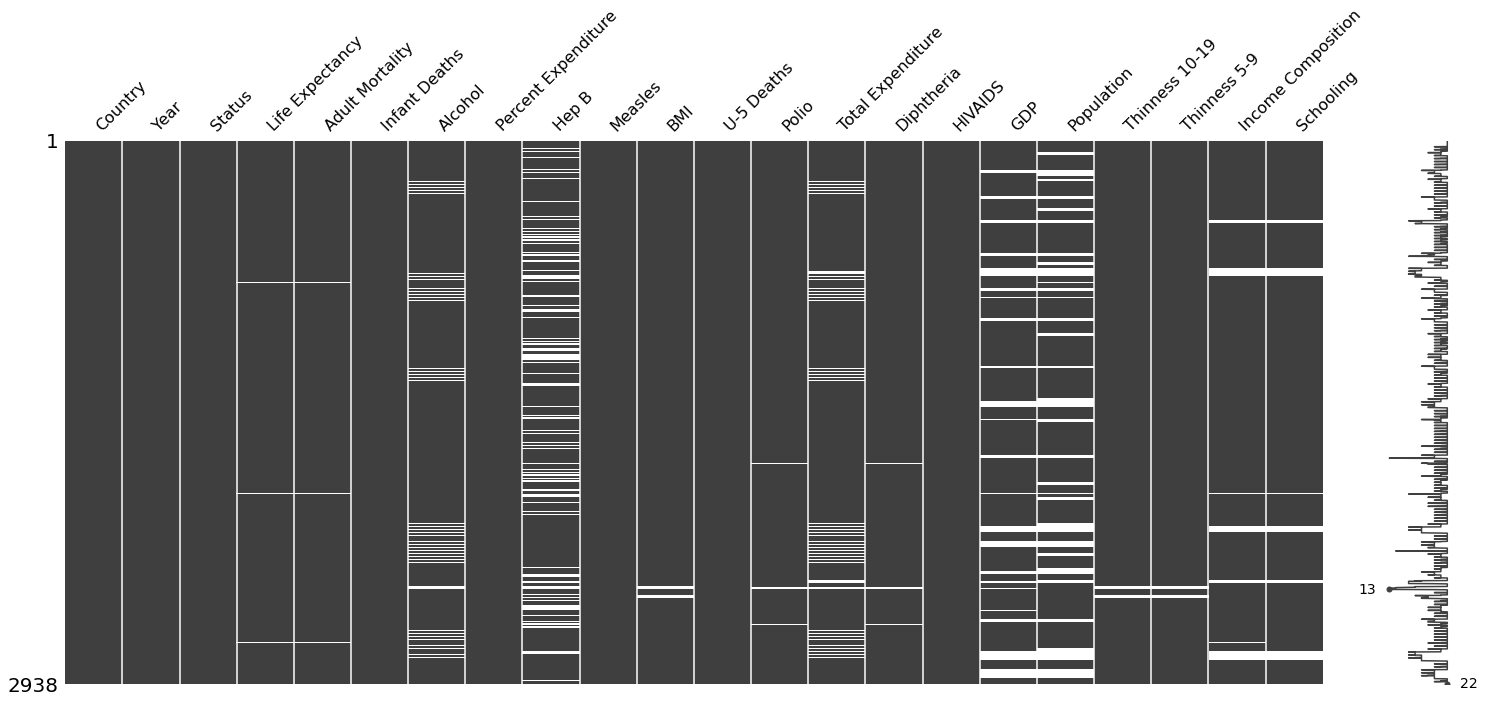

In [16]:
import missingno as msno
print(msno.matrix(df))
df.describe()

<ipython-input-17-6d5359fc6316>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][i]=df[df['Country']==country][column].mean()


(2938, 20)
AxesSubplot(0.125,0.125;0.698618x0.755)


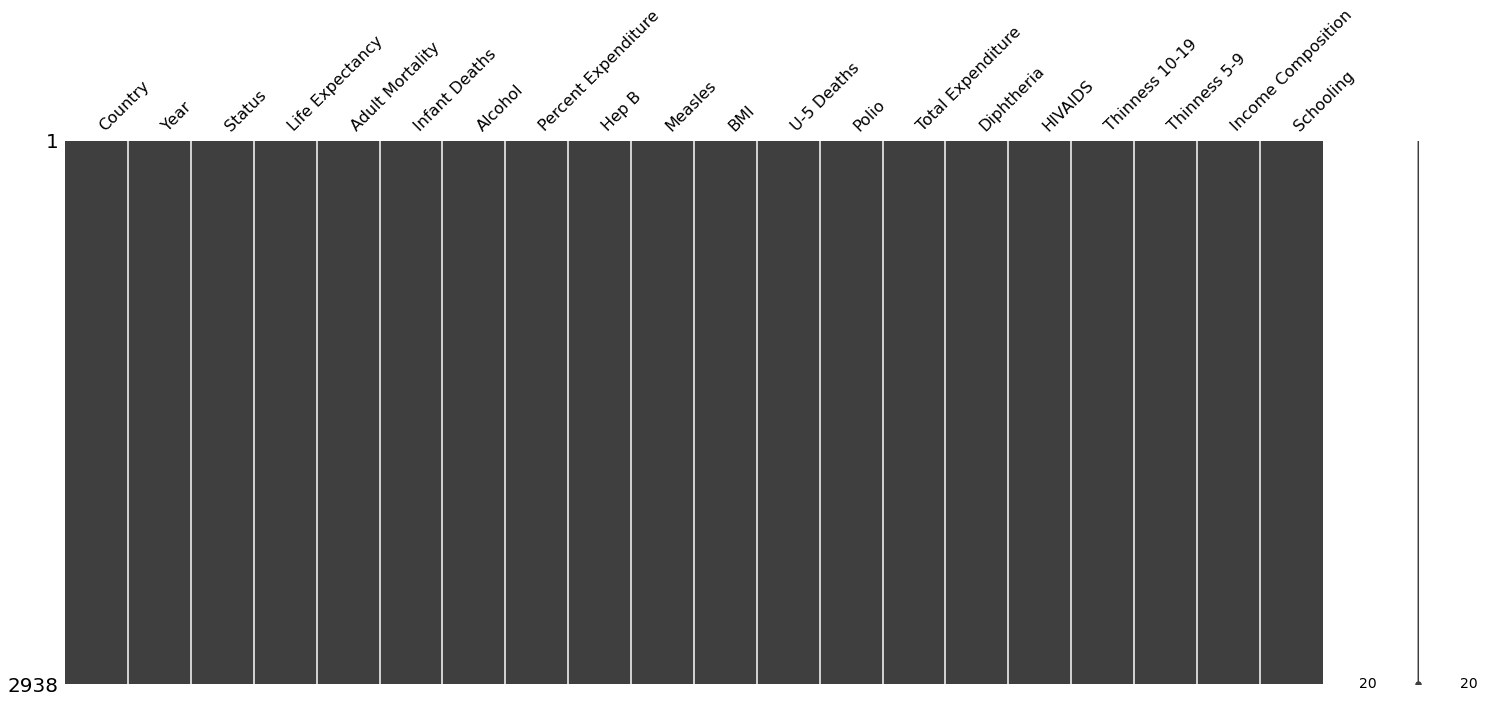

In [17]:
#Drop Population and GDP
df=df.drop(['Population','GDP'],axis=1)

#Replace Missing Values Associated with Country Feature Mean
for column in df.columns:
    for i in range(len(df)): 
        country=df['Country'][i]
        status=df['Country'][i]
        if (df[column].isnull()[i]==True):
            df[column][i]=df[df['Country']==country][column].mean() 
        else:
             pass
#Fill Unresolved Values by Status
df1=df[(df['Status']=='Developed')].fillna(df[(df['Status']=='Developed')].mean())
df2=df[(df['Status']=='Developing')].fillna(df[(df['Status']=='Developing')].mean())
df=df2.append(df1)
print(df.shape)
print(msno.matrix(df))


In [5]:
#Features with Outliers 
numcol=['Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percent Expenditure', 'Hep B',
       'Measles', 'BMI', 'U-5 Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIVAIDS', 'Thinness 10-19', 'Thinness 5-9',
       'Income Composition', 'Schooling']
for column in numcol:
    if df[column].quantile(.9973)<df[column].max():
        print(column)
        print('99th Percentile',df[column].quantile(.9973))
        print('Max',df[column].max())
        print('Outliers Present in Column {}'.format(column))
        print('')
    elif df[column].quantile(0)>df[column].min():
        print(column)
        print('99th Percentile',df[column].quantile(.9973))
        print('Min',df[column].min())
        print('Outliers Present in Column {}'.format(column))
        print('')
    else:
        pass

Adult Mortality
99th Percentile 675.2803999999978
Max 723.0
Outliers Present in Column Adult Mortality

Infant Deaths
99th Percentile 1307.0099999999456
Max 1800
Outliers Present in Column Infant Deaths

Alcohol
99th Percentile 15.074906999999962
Max 17.87
Outliers Present in Column Alcohol

Percent Expenditure
99th Percentile 15357.426040963908
Max 19479.91161
Outliers Present in Column Percent Expenditure

Measles
99th Percentile 111472.72849999576
Max 212183
Outliers Present in Column Measles

BMI
99th Percentile 76.72803999999978
Max 87.3
Outliers Present in Column BMI

U-5 Deaths
99th Percentile 1807.0099999999456
Max 2500
Outliers Present in Column U-5 Deaths

Total Expenditure
99th Percentile 16.228740999999776
Max 17.6
Outliers Present in Column Total Expenditure

HIVAIDS
99th Percentile 42.19813999999924
Max 50.6
Outliers Present in Column HIVAIDS

Thinness 10-19
99th Percentile 27.007009999999944
Max 27.7
Outliers Present in Column Thinness 10-19

Thinness 5-9
99th Percentile

In [18]:
df.describe()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIVAIDS,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.217738,164.857839,30.303948,4.594394,738.251295,78.970357,2419.592240,38.287849,42.035739,82.396266,5.917162,82.183944,1.742103,4.848421,4.879169,0.629394,12.025459
std,4.613841,9.508437,124.084750,117.926501,4.028168,1987.914858,24.607214,11467.272489,19.930067,160.445548,23.476067,2.456024,23.743205,5.077785,4.395274,4.483454,0.207021,3.304714
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,0.930000,4.685343,73.500000,0.000000,19.400000,0.000000,78.000000,4.280000,78.000000,0.100000,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,3.685000,64.912906,88.000000,17.000000,43.000000,4.000000,93.000000,5.710000,93.000000,0.100000,3.400000,3.400000,0.672000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.677500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,7.100000,7.200000,0.780000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,27.700000,28.600000,0.948000,20.700000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

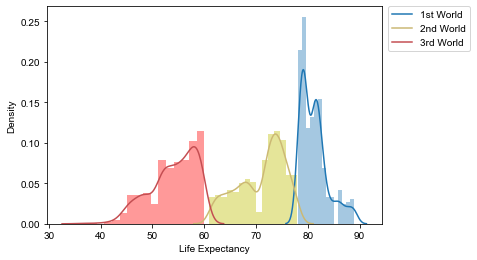

ShapiroResult(statistic=0.9566084742546082, pvalue=9.622531605232346e-29)


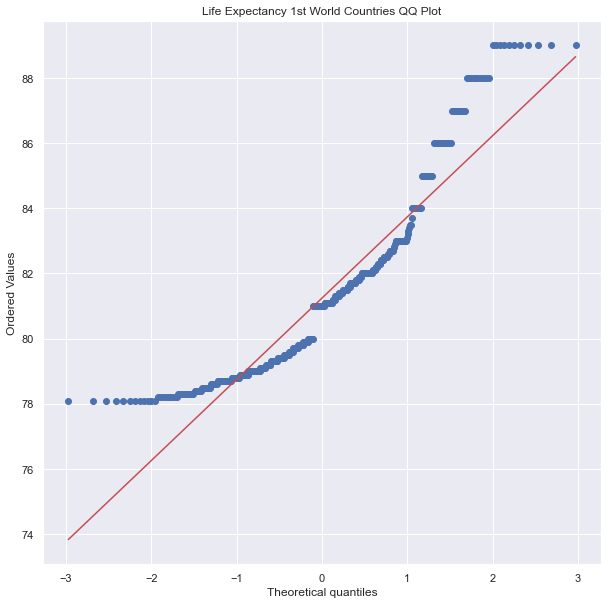

ShapiroResult(statistic=0.9566084742546082, pvalue=9.622531605232346e-29)


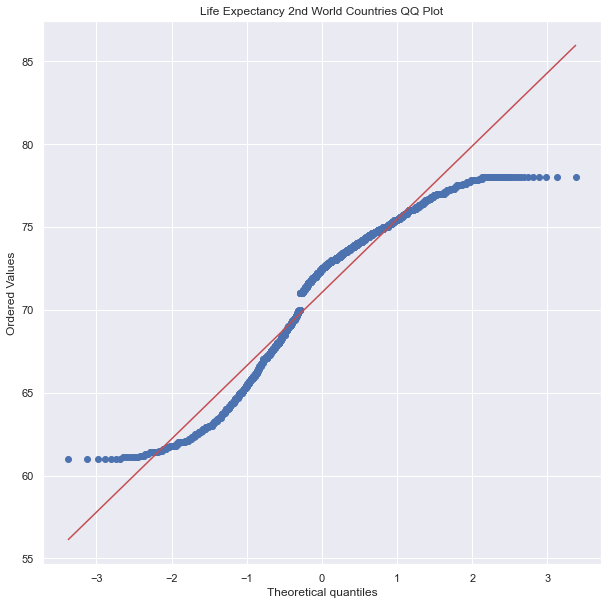

ShapiroResult(statistic=0.9566084742546082, pvalue=9.622531605232346e-29)


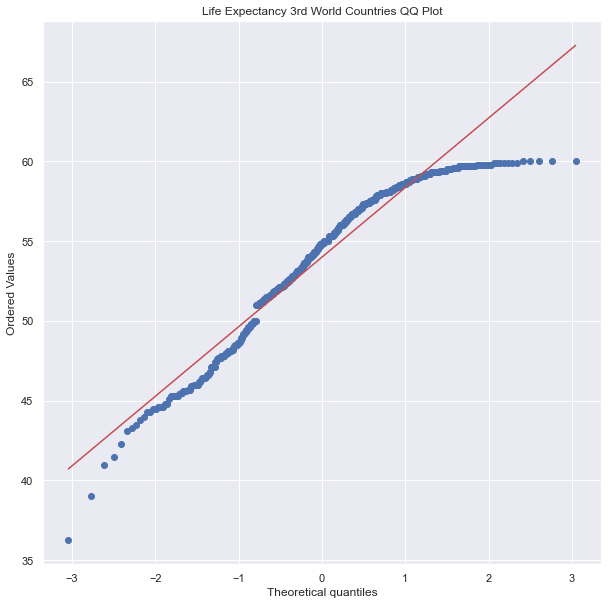

,count,mean,std,min,25%,50%,75%,max
world,,,,,,,,
3,594.0,53.994613,4.483506,36.3,51.425,54.8,57.9,60.0
2,1877.0,71.043108,4.554366,61.0,67.500,72.5,74.6,78.0
1,467.0,81.244111,2.640365,78.1,79.100,81.0,82.3,89.0


In [19]:
bins=[36,60,78,90]
labels=[3,2,1]
df['world']=pd.cut(df['Life Expectancy'],bins=bins,labels=labels)

#Life Expectancy 
sns.distplot(df[df['world']==1]['Life Expectancy'])
sns.distplot(df[df['world']==2]['Life Expectancy'],color='y')
sns.distplot(df[df['world']==3]['Life Expectancy'],color='r')

labels=['1st World','2nd World','3rd World']
plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

#QQ plot   
stats.probplot(df[df['world']==1]['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy 1st World Countries QQ Plot')
print(stats.shapiro(df['Life Expectancy']))
plt.show()
#QQ plot   
stats.probplot(df[df['world']==2]['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy 2nd World Countries QQ Plot')
print(stats.shapiro(df['Life Expectancy']))
plt.show()

stats.probplot(df[df['world']==3]['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy 3rd World Countries QQ Plot')
print(stats.shapiro(df['Life Expectancy']))
plt.show()
df['Life Expectancy'].groupby(df['world']).describe()


In [20]:
#Encode Country and Create copy of dataframe for regression 
df_reg=df.copy()
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_reg["country_code"] = lb_make.fit_transform(df_reg["Country"])


#Binarize Status
df_reg['Status']=np.where(df_reg['Status']=='Developing',0,1)

df_reg.columns=['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percent_Expenditure', 'Hep_B', 'Measles',
       'BMI', 'U_5_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV_AIDS', 'Thinness_10_19', 'Thinness_5_9', 'Income_Composition',
       'Schooling', 'world', 'country_code']

In [21]:
#remove outliers
for col in df_reg.columns:
    if (col=='world')or (col=='Country'):
        pass
    else:
        df_reg=df_reg[np.abs(df_reg[col]-df_reg[col].mean())<=(3*df_reg[col].std())]

In [22]:
#Developed Training Data
X_developed_train=df_reg[(df_reg['Status']==1)&(df_reg['Year']<2011)].drop('Life_Expectancy',axis=1)
Y_developed_train=df_reg[(df_reg['Status']==1)&(df_reg['Year']<2011)]['Life_Expectancy']

#Developed Testing Data
X_developed_test=df_reg[(df_reg['Status']==1)&(df_reg['Year']>2011)].drop('Life_Expectancy',axis=1)
Y_developed_test=df_reg[(df_reg['Status']==1)&(df_reg['Year']>2011)]['Life_Expectancy']

#Developing Training Data
X_developing_train=df_reg[(df_reg['Status']==0)&(df_reg['Year']<2011)].drop('Life_Expectancy',axis=1)
Y_developing_train=df_reg[(df_reg['Status']==0)&(df_reg['Year']<2011)]['Life_Expectancy']

#Developing Testing Data
X_developing_test=df_reg[(df_reg['Status']==0)&(df_reg['Year']>2011)].drop('Life_Expectancy',axis=1)
Y_developing_test=df_reg[(df_reg['Status']==0)&(df_reg['Year']>2011)]['Life_Expectancy']

#World=1 Training Data
X_world1_train=df_reg[(df_reg['world']==1)&(df_reg['Year']<2011)].drop('Life_Expectancy',axis=1)
Y_world1_train=df_reg[(df_reg['world']==1)&(df_reg['Year']<2011)]['Life_Expectancy']

#World=1 Testing Data
X_world1_test=df_reg[(df_reg['world']==1)&(df_reg['Year']>2011)].drop('Life_Expectancy',axis=1)
Y_world1_test=df_reg[(df_reg['world']==1)&(df_reg['Year']>2011)]['Life_Expectancy']

#World=2 Training Data
X_world2_train=df_reg[(df_reg['world']==2)&(df_reg['Year']<2011)].drop('Life_Expectancy',axis=1)
Y_world2_train=df_reg[(df_reg['world']==2)&(df_reg['Year']<2011)]['Life_Expectancy']

#World=2 Testing Data
X_world2_test=df_reg[(df_reg['world']==2)&(df_reg['Year']>2011)].drop('Life_Expectancy',axis=1)
Y_world2_test=df_reg[(df_reg['world']==2)&(df_reg['Year']>2011)]['Life_Expectancy']

#World=3 Training Data
X_world3_train=df_reg[(df_reg['world']==3)&(df_reg['Year']<2011)].drop('Life_Expectancy',axis=1)
Y_world3_train=df_reg[(df_reg['world']==3)&(df_reg['Year']<2011)]['Life_Expectancy']

#World=3 Testing Data
X_world3_test=df_reg[(df_reg['world']==3)&(df_reg['Year']>2011)].drop('Life_Expectancy',axis=1)
Y_world3_test=df_reg[(df_reg['world']==3)&(df_reg['Year']>2011)]['Life_Expectancy']

#Full Training Set
X_train=df_reg[df_reg['Year']<2011].drop('Life_Expectancy',axis=1)
Y_train=df_reg[df_reg['Year']<2011]['Life_Expectancy']

#Full Testing Set
X_test=df_reg[df_reg['Year']>2011].drop('Life_Expectancy',axis=1)
Y_test=df_reg[df_reg['Year']>2011]['Life_Expectancy']

#Full Set
X=df_reg.drop('Life_Expectancy',axis=1)
Y=df_reg['Life_Expectancy']

#Breakdown
Xlist=[X_developed_train,X_developed_test,X_developing_train,X_developing_test,
       X_world1_train,X_world1_test,X_world2_train,X_world2_test,X_world3_train,X_world3_test,
       X_train,X_test,X]
Ylist=[Y_developed_train,Y_developed_test,Y_developing_train,Y_developing_test,
       Y_world1_train,Y_world1_test,Y_world2_train,Y_world2_test,Y_world3_train,Y_world3_test,
       Y_train,Y_test,Y]
xlist=['X_developed_train','X_developed_test','X_developing_train','X_developing_test',
       'X_world1_train','X_world1_test','X_world2_train','X_world2_test','X_world3_train','X_world3_test',
       'X_train','X_test','X']
status=['Developed','Developed','Developing','Developing',
                   '1st World','1st World','2nd World','2nd World','3rd World','3rd World',
                   'Full Training','Full Testing','Full']

In [23]:
df_reg['Life_Expectancy'].describe()

count    2157.000000
mean       70.663418
std         8.447265
min        41.000000
25%        65.900000
50%        72.900000
75%        76.000000
max        89.000000
Name: Life_Expectancy, dtype: float64

In [48]:
xtemp = X
ytemp = Y
from sklearn.linear_model import TheilSenRegressor
from sklearn.preprocessing import scale
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder

xtemp=xtemp.drop(['Country','world','Status','Infant_Deaths','Thinness_10_19'],axis=1)
xtemp=scale(xtemp)
th = TheilSenRegressor(random_state=52).fit(xtemp,ytemp)

data= {'Year': 2016,
       "Adult_Mortality":263.0,
       "Alcohol":0.01,
       "Percent_Expenditure":71.279624,
       "Hep_B":65.0,
       "Measles":1154,
       "BMI":19.1,
       "U_5_Deaths":83,
       "Polio":6.0,	
       "Total_Expenditure":8.16,
       "Diphtheria":65.0,
       "HIV_AIDS":0.1,
       "Thinness_5_9":17.3,
       "Income_Composition":0.479,
       "Schooling":10.1,
       "country_code":1
      }

data =  pd.DataFrame([data])
data = scale(data)
result = th.predict(data)

print(result)



[70.8729924]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Thiel X_developed_train
X_developed_train (278, 16)
R^2 Score:0.6910
RMSE: 2.175
Minimum LE: 69.8
Maximum LE: 84.1
Average Predicted LE: 77.9
LE Standard Deviation: 3.262
LE Variance: 10.643


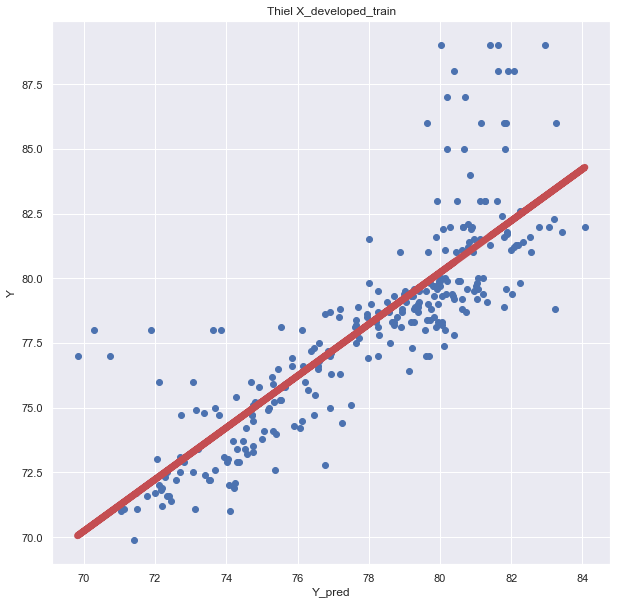

Thiel X_developed_test
X_developed_test (105, 16)
R^2 Score:0.6159
RMSE: 2.439
Minimum LE: 73.3
Maximum LE: 88.4
Average Predicted LE: 80.6
LE Standard Deviation: 3.163
LE Variance: 10.006


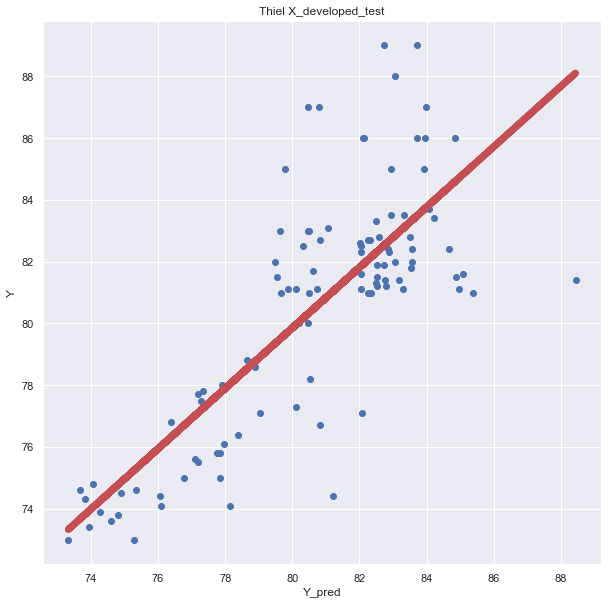

Thiel X_developing_train
X_developing_train (1129, 16)
R^2 Score:0.8434
RMSE: 3.272
Minimum LE: 41.3
Maximum LE: 82.7
Average Predicted LE: 68.5
LE Standard Deviation: 7.744
LE Variance: 59.969


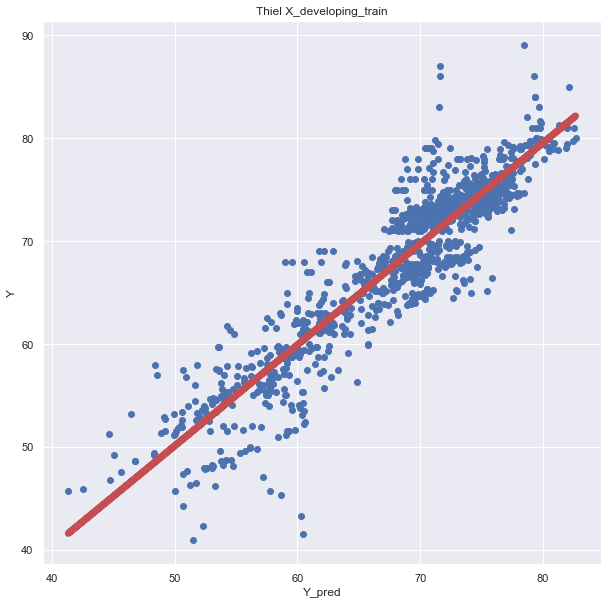

Thiel X_developing_test
X_developing_test (501, 16)
R^2 Score:0.8185
RMSE: 3.192
Minimum LE: 48.1
Maximum LE: 85.1
Average Predicted LE: 70.0
LE Standard Deviation: 7.120
LE Variance: 50.702


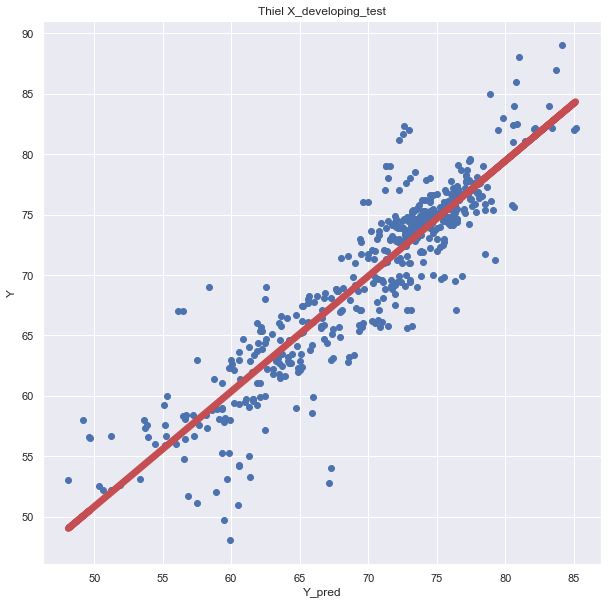

Thiel X_world1_train
X_world1_train (226, 16)
R^2 Score:-9.4894
RMSE: 8.286
Minimum LE: -20.1
Maximum LE: 84.3
Average Predicted LE: 79.5
LE Standard Deviation: 8.252
LE Variance: 68.092


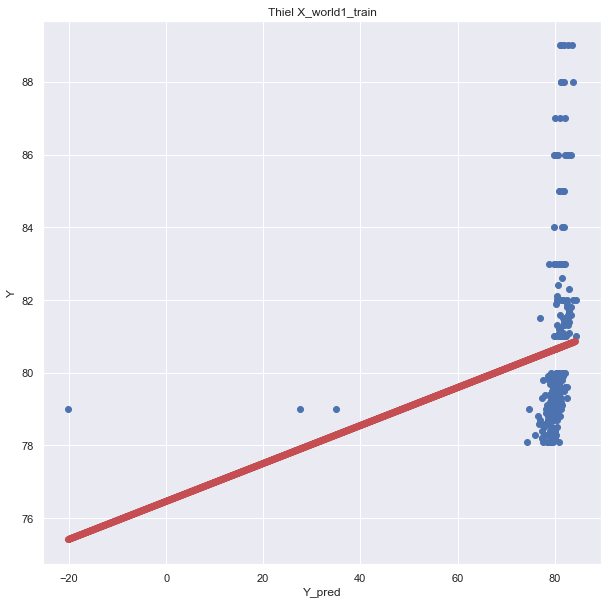

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Thiel X_world1_test
X_world1_test (110, 16)
R^2 Score:0.1590
RMSE: 2.265
Minimum LE: 74.8
Maximum LE: 88.0
Average Predicted LE: 82.5
LE Standard Deviation: 1.660
LE Variance: 2.757


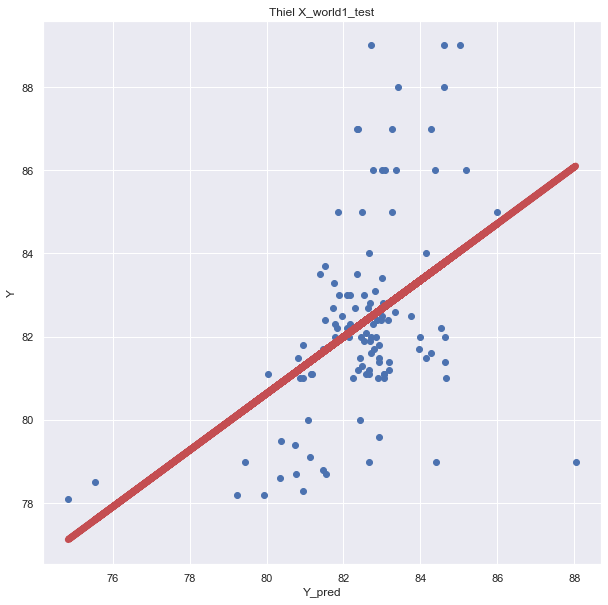

Thiel X_world2_train
X_world2_train (966, 16)
R^2 Score:0.6533
RMSE: 2.549
Minimum LE: 59.7
Maximum LE: 80.2
Average Predicted LE: 71.3
LE Standard Deviation: 3.794
LE Variance: 14.394


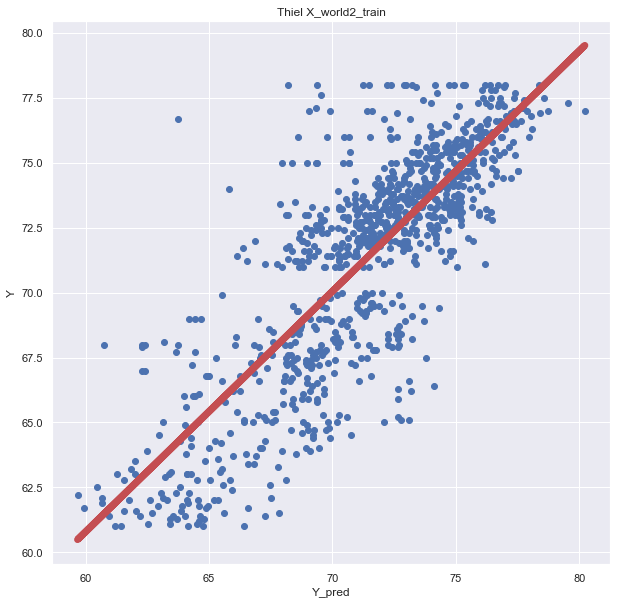

Thiel X_world2_test
X_world2_test (427, 16)
R^2 Score:0.7284
RMSE: 2.481
Minimum LE: 51.8
Maximum LE: 78.5
Average Predicted LE: 71.6
LE Standard Deviation: 4.636
LE Variance: 21.495


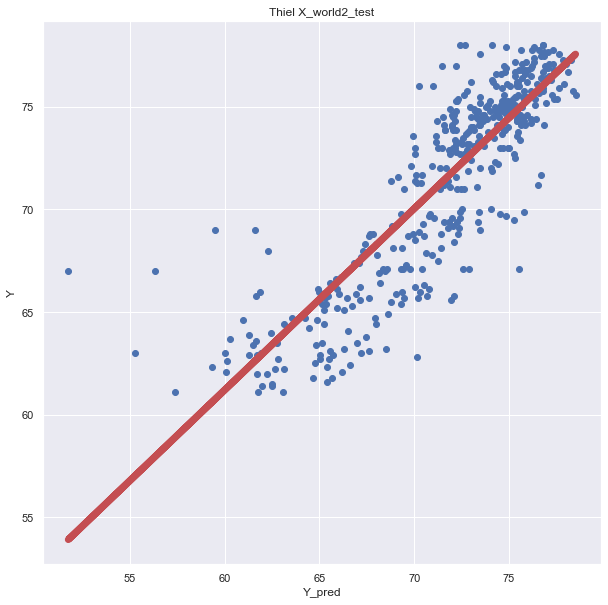

Thiel X_world3_train
X_world3_train (215, 16)
R^2 Score:0.3860
RMSE: 3.320
Minimum LE: 45.3
Maximum LE: 61.5
Average Predicted LE: 54.9
LE Standard Deviation: 2.872
LE Variance: 8.249


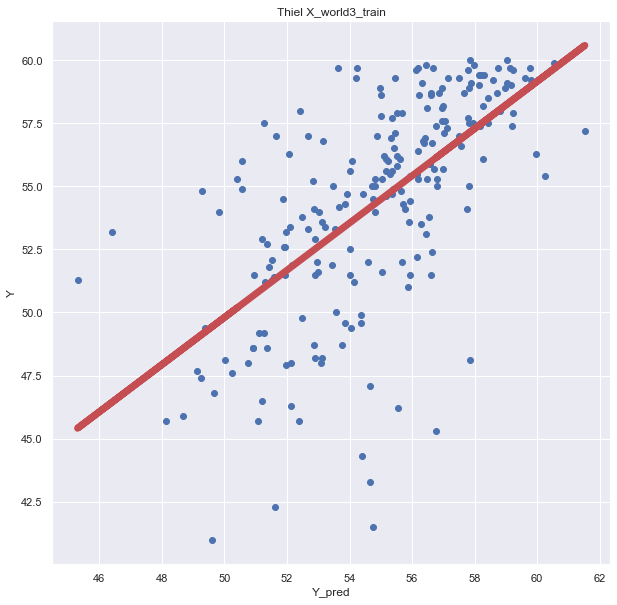

Thiel X_world3_test
X_world3_test (69, 16)
R^2 Score:0.3971
RMSE: 2.245
Minimum LE: 52.3
Maximum LE: 60.9
Average Predicted LE: 57.0
LE Standard Deviation: 2.208
LE Variance: 4.873


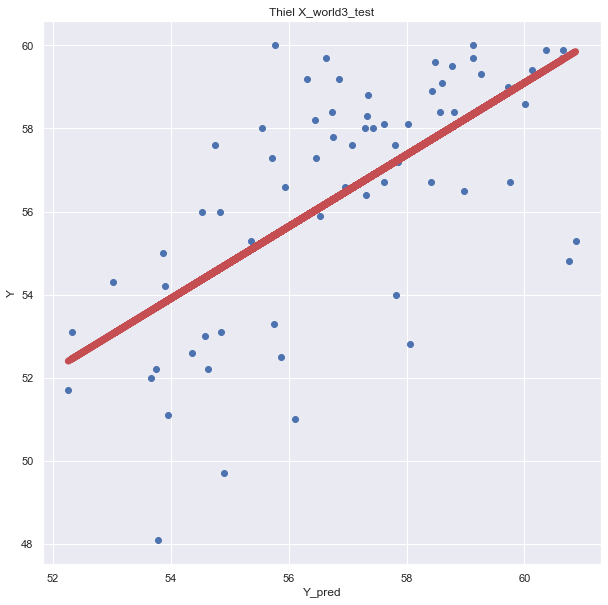

Thiel X_train
X_train (1407, 16)
R^2 Score:0.8620
RMSE: 3.180
Minimum LE: 41.5
Maximum LE: 83.6
Average Predicted LE: 70.3
LE Standard Deviation: 7.915
LE Variance: 62.651


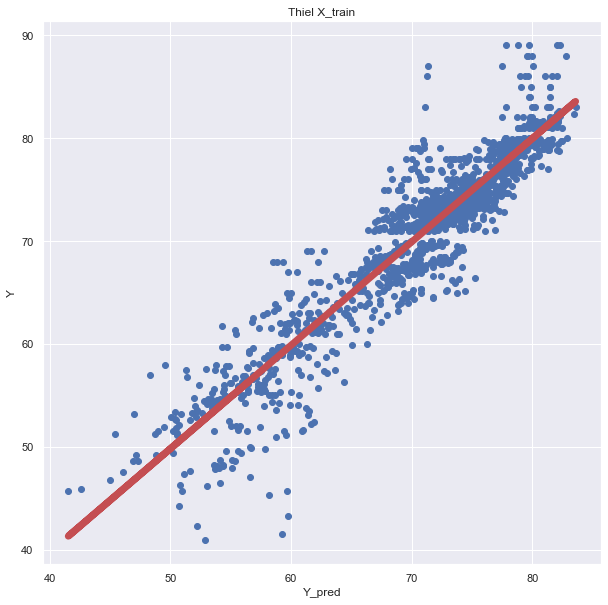

Thiel X_test
X_test (606, 16)
R^2 Score:0.8350
RMSE: 3.272
Minimum LE: 47.3
Maximum LE: 87.5
Average Predicted LE: 71.9
LE Standard Deviation: 7.798
LE Variance: 60.806


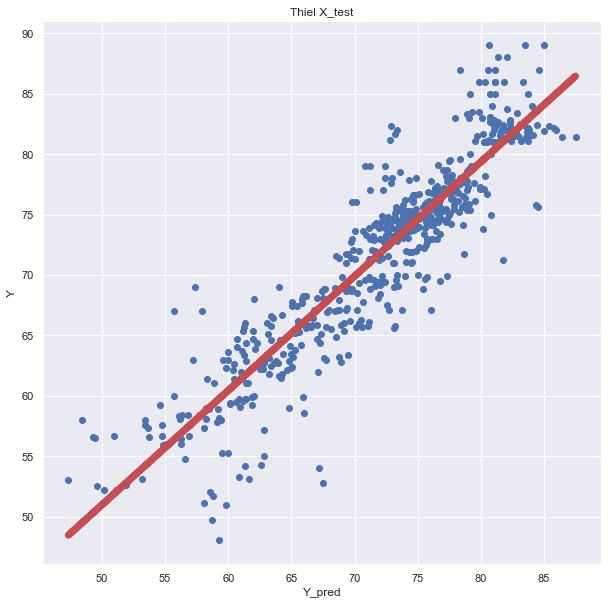

Thiel X
X (2157, 16)
R^2 Score:0.8572
RMSE: 3.191
Minimum LE: 41.5
Maximum LE: 84.5
Average Predicted LE: 70.9
LE Standard Deviation: 7.791
LE Variance: 60.694


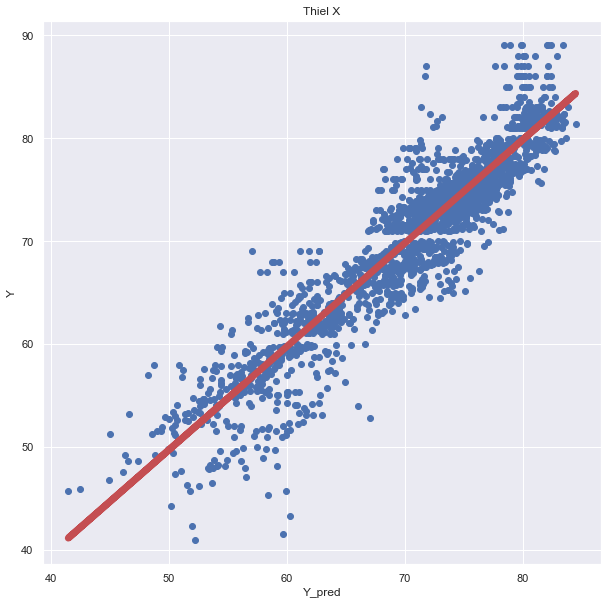

In [120]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.preprocessing import scale
from pylab import rcParams
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x=x.drop(['Country','world','Status','Infant_Deaths','Thinness_10_19'],axis=1)
    
    x=scale(x)
    
    if i==0:
        print('Thiel {}'.format(z))
        print(z,x.shape)
        #Model
        theil = TheilSenRegressor(random_state=52).fit(x,y)
        
        #R2 
        R=theil.score(x,y)
        print('R^2 Score:{:0.4f}'.format(R))

        #Predictions
        Y_pred=theil.predict(x)
        RMSE=mean_squared_error(y, Y_pred)**0.5
        print('RMSE: {:0.3f}'.format(RMSE))
        print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
        print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
        print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
        print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
        print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
        #plot
        z1=np.polyfit(Y_pred,y,1)
        z1poly = np.poly1d(z1) 
        plt.scatter(Y_pred,y,alpha=1)
        plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
        plt.title('Thiel {}'.format(z))
        plt.xlabel('Y_pred')
        plt.ylabel('Y')
        rcParams['figure.figsize'] = 10, 10
        plt.show()
        
        #Result DataFrame
        results = pd.DataFrame()
        results["Method"]=['Thiel']
        results['Set']=z
        results['Status']=s
        results['Datapoint Count']=x.shape[0]*x.shape[1]
        results["RMSE"] = RMSE.round(2)
        results["R^2"] = R.round(2)
        results['LE Min']=Y_pred.min().round(1)
        results['LE Max']=Y_pred.max().round(1)
        results['Average LE']=Y_pred.mean().round(1)
        results['LE Std']=Y_pred.std().round(2)
        results['LE Var']=(Y_pred.std()**2).round(1)

    else:
        print('Thiel {}'.format(z))
        print(z,x.shape)
        #Model
        theil = TheilSenRegressor(random_state=52).fit(x,y)
        
        #R2 
        R=theil.score(x,y)
        print('R^2 Score:{:0.4f}'.format(R))

        #Predictions
        Y_pred=theil.predict(x)
        RMSE=mean_squared_error(y, Y_pred)**0.5
        print('RMSE: {:0.3f}'.format(RMSE))
        print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
        print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
        print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
        print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
        print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
        #plot
        z1=np.polyfit(Y_pred,y,1)
        z1poly = np.poly1d(z1) 
        plt.scatter(Y_pred,y,alpha=1)
        plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
        plt.title('Thiel {}'.format(z))
        plt.xlabel('Y_pred')
        plt.ylabel('Y')
        rcParams['figure.figsize'] = 10, 10
        plt.show()
        
        #Add to results
        results.loc[i] = ['Thiel',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]

array([[-1.51800281,  1.60578561, -1.1688795 , ..., -2.22674324,
        -2.26780428, -1.70577864],
       [-1.73681676,  1.65387513, -1.1688795 , ..., -2.2399939 ,
        -2.40521883, -1.70577864],
       [ 1.54539259, -0.72174703, -0.04879787, ...,  0.56914794,
         0.58354759, -1.68765209],
       ...,
       [-1.29918885, -0.59671429,  1.62034338, ...,  1.16866932,
         1.1488278 ,  1.5932545 ],
       [-1.51800281, -0.58709638,  1.49100934, ...,  1.16866932,
         1.1488278 ,  1.5932545 ],
       [-1.73681676, -0.57747848,  1.41292086, ...,  1.16866932,
         1.1488278 ,  1.5932545 ]])

In [118]:
from sklearn.preprocessing import LabelEncoder

temp = X_test
temp = temp.drop(['Country','world','Status','Infant_Deaths','Thinness_10_19'],axis=1)

temp

,Year,Adult_Mortality,Alcohol,Percent_Expenditure,Hep_B,Measles,BMI,U_5_Deaths,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,Thinness_5_9,Income_Composition,Schooling,country_code
16,2015,74.0,4.600000,364.975229,99.000000,0,58.0,0,99.0,6.000000,99.0,0.1,1.3,0.762000,14.200000,1
17,2014,8.0,4.510000,428.749067,98.000000,0,57.2,1,98.0,5.880000,98.0,0.1,1.3,0.761000,14.200000,1
18,2013,84.0,4.760000,430.876979,99.000000,0,56.5,1,99.0,5.660000,99.0,0.1,1.4,0.759000,14.200000,1
19,2012,86.0,5.140000,412.443356,99.000000,9,55.8,1,99.0,5.590000,99.0,0.1,1.4,0.752000,14.200000,1
32,2015,19.0,0.406667,0.000000,95.000000,63,59.5,24,95.0,4.604000,95.0,0.1,5.8,0.743000,14.400000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,2015,49.0,10.338000,0.000000,86.194989,35,57.4,0,97.0,6.087333,97.0,0.1,0.3,0.938000,16.000000,166
2762,2015,69.0,10.660000,0.000000,86.194989,91,66.6,4,96.0,8.534000,96.0,0.1,0.6,0.852489,15.845474,182
2763,2014,71.0,10.370000,0.000000,86.194989,133,66.0,4,95.0,9.120000,95.0,0.1,0.5,0.852489,15.845474,182
2764,2013,72.0,10.320000,0.000000,86.194989,1919,65.4,4,95.0,9.340000,95.0,0.1,0.5,0.852489,15.845474,182


In [13]:
import pickle

In [30]:
pickle.dump(theil, open("model.pkl", "wb"))

In [52]:
temp = X_test
temp = temp.drop(['Country','world','Status','Infant_Deaths','Thinness_10_19'],axis=1)
temp 

data= {'Year': 2015,
       "Adult_Mortality":74.0,
       "Alcohol":4.60,
       "Percent_Expenditure":364.97,
       "Hep_B":99.0,
       "Measles":0,
       "BMI":58,
       "U_5_Deaths":0,
       "Polio":99.0,	
       "Total_Expenditure":6.0,
       "Diphtheria":99.0,
       "HIV_AIDS":0.1,
       "Thinness_5_9":1.3,
       "Income_Composition":0.762000,
       "Schooling":14.20,
       "country_code":1
      }

In [2]:
import requests
import json

In [41]:
url = 'http://127.0.0.1:5000'

data= {'Year': 2000,
       "Adult_Mortality":137.0,
       "Alcohol":7.68,
       "Percent_Expenditure":1349.025282,
       "Hep_B":0,
       "Measles":6,
       "BMI":54.0,
       "U_5_Deaths":14,
       "Polio":88.0,	
       "Total_Expenditure":9.21,
       "Infant_Deaths":12.0,
       "Diphtheria":83.0,
       "HIV_AIDS":0.1,
       "Thinness_5_9":1.1,
       "Thinness_10_19":1.2,
       "Income_Composition":0.764,
       "Schooling":15.0,
       "country_code":0,
      }

# data= {'Year': 2015,
#        "Adult_Mortality":263.0,
#        "Alcohol":0.01,
#        "Percent_Expenditure":71.279624,
#        "Hep_B":65.0,
#        "Measles":1154,
#        "BMI":19.1,
#        "U_5_Deaths":83,
#        "Polio":6.0,	
#        "Total_Expenditure":8.16,
#        "Infant_Deaths":62,
#        "Diphtheria":65.0,
#        "HIV_AIDS":0.1,
#        "Thinness_5_9":17.3,
#        "Thinness_10_19":17.2,
#        "Income_Composition":0.479,
#        "Schooling":10.1,
#        "country_code":0
#       }

data = json.dumps(data)


send_req = requests.post(url,data)
print(send_req.json())


{'results': {'results': 73.12514358327019}}
